In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm #안쓸듯
import sklearn as sk

#### 특성공학 / 규제
데이터 준비

In [4]:
df = pd.read_csv("https://bit.ly/perch_csv")
df.tail()

,length,height,width
51,42.0,12.80,6.87
52,43.0,11.93,7.28
53,43.0,12.51,7.42
54,43.5,12.60,8.14
55,44.0,12.49,7.60


In [5]:
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

##### 농어 데이터
농어의 길이, 높이, 두께 ---> 농어의 무게를 예측

무게 데이터

In [6]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                     150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0,
                     300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0,
                     685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0,
                     820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [7]:
len(perch_weight)

56

#### 훈련 세트 / 데이터 세트 나누기

In [8]:
from sklearn.model_selection import train_test_split

In [26]:
train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                        perch_weight,
                                                                        #test_size=0.3,
                                                                        random_state=42)
#test_size = 0.3 : 테스트 데이터의 크기를 30%를 사용하겠다
#random_state : 랜덤으로 인덱스가 바뀜

In [27]:
print(train_input.shape)
print(test_input.shape)

(42, 3)
(14, 3)


In [28]:
print(train_target.shape)
print(test_target.shape)

(42,)
(14,)


#### 사이킷런 변환기

특성이 하나 이상일때 하나의 특성(새 회귀방정식) 만드는 것

In [29]:
from sklearn.preprocessing import PolynomialFeatures
# preprocessing : 전처리
# PolynomialFeatures : 다중다항

##### 예제


In [36]:
poly = PolynomialFeatures(include_bias=False)
    # include_bias=False : 자기 특성은 빼고
poly.fit([[2,3]])
poly.transform([[2,3]])
# [x,y] -> [2,3]

array([[2., 3., 4., 6., 9.]])

In [37]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

##### 농어 데이터 3개의 특징
트랜스포머로 특징을 분리

In [57]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [58]:
poly.get_feature_names()
#길이:x0
#높이:x1
#두께:x2

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [59]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

##### 다중 회귀모델 훈련

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)
lr.score(X=train_poly, y=train_target)

0.9903183436982124

In [61]:
lr.score(X=test_poly, y=test_target)

0.9714559911594145

In [62]:
pred_x = [[50, 13.5, 9.2]]
poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
pred_poly = poly.transform(pred_x)
pred_poly.shape

(1, 9)

In [63]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [65]:
# 9개의 특성으로 예측해야 함
lr.predict(X=pred_poly)
#길이, 높이, 두께

array([1634.45893639])

#### 추가적인 내용

In [66]:
# 더 많은 특성 사용
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [67]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [68]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999996176

In [70]:
lr.score(X=test_poly, y=test_target)

-144.40585108215134

=> 과대적합 (적합하지 않은 모델, 사용불가)

#### 표준화작업

입력값 - 평균 / 표준편차  ( => 일정한 단위가 되도록 만듦 )

In [71]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [72]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [75]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [76]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

### 규제

훈련세트에 치중해서 과대적합이 되지 않도록 해주는 작업 -- 릿지 모델 / 라쏘 모델

#### 릿지 회귀 모델

In [77]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=train_scaled, y=train_target)
ridge.score(X=train_scaled, y=train_target)

0.9896101671037343

In [78]:
ridge.score(X=test_scaled, y=test_target)

0.9790693977615383

#### 하이퍼 파라미터 alpha값 찾기

In [79]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [82]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=train_scaled, y=train_target)

    train_score.append(ridge.score(X=train_scaled, y=train_target))
    test_score.append(ridge.score(X=test_scaled, y=test_target))
    

In [92]:
print(train_score)
print(test_score)

[0.9930455252088513, 0.9917809981250514, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961546104, 0.9800187936870526, 0.9827976465386937, 0.9790693977615383, 0.9725329582461569, 0.9627042641050291]


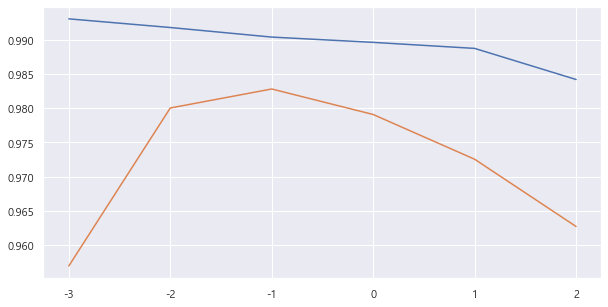

In [90]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [93]:
# alpha값은 -1 =0.1이 되면 가장 적합

ridge = Ridge(alpha=0.1) #알파값 변경하면서 생성(6번)
ridge.fit(X=train_scaled, y=train_target)

print(ridge.score(X=train_scaled, y=train_target))
print(ridge.score(X=test_scaled, y=test_target))

0.9903815817570366
0.9827976465386937


In [98]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [99]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) 

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]
400.8333333333333


#### 라쏘 회귀 모델

In [100]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=train_scaled, y=train_target)
print(lasso.score(X=train_scaled, y=train_target))
print(lasso.score(X=test_scaled, y=test_target))

0.9908634969382497
0.9836916306245594


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\3018768275.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=train_scaled, y=train_target)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+04, tolerance: 5.183e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [101]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) 

[-47.98998963  21.86161322 -42.99083106 168.50363136  16.30825922
  16.52989155 -11.81149416   4.52552929  34.49086127  32.01792123
  24.46040028  13.51332855  -2.49254015   0.75364956  28.33219007
 -33.57148139 -10.12186614  22.67084212  52.22609408 -32.83607079
  39.65118557 -11.28024517  36.53475327 -24.22523174   2.29259586
  30.48891301 -35.45654966  -4.43188774  25.14285715   5.38175844
 -45.1007785   -9.63891382  24.24154276  55.55161322 -41.72946433
  58.60664271 -44.89277322  88.94828513 -58.08190931 -32.23654678
 117.09995566 -69.54385819 -39.72641779 -10.31893679 127.05432684
 -79.15591957 -45.3576263  -11.96292128  20.18976925 103.87763603
 -87.22517771 -49.44616717 -12.11822109  23.70746893  57.07012503]
400.83333333333326


간단하지만 특성값을 0으로 만들때도 있기때문에 자주 사용 X